In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import project_tests as t
import pickle

%matplotlib inline

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [2]:
# Show df_content to get an idea of the data
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.  

In [3]:
per_user = df.groupby('email').count()['article_id']

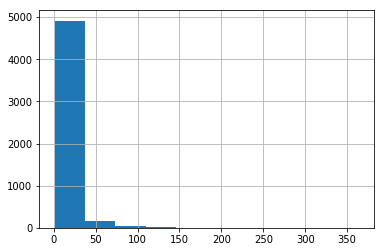

In [4]:
per_user.hist(bins=10)

In [5]:
per_user.describe()

count    5148.000000
mean        8.930847
std        16.802267
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       364.000000
Name: article_id, dtype: float64

In [6]:
per_user.median()

3.0

In [7]:
# Fill in the median and maximum number of user_article interactios below

median_val = 3 # 50% of individuals interact with ____ number of articles or fewer.
max_views_by_user = 364 # The maximum number of user-article interactions by any 1 user is ______.

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [8]:
# Find and explore duplicate articles
df_content.nunique()

doc_body           1036
doc_description    1022
doc_full_name      1051
doc_status            1
article_id         1051
dtype: int64

In [9]:
df_content.shape

(1056, 5)

In [10]:
# Remove any rows that have the same article_id - only keep the first
df_content.drop_duplicates(subset='article_id', inplace=True)

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

In [11]:
df.nunique()

article_id     714
title          714
email         5148
dtype: int64

In [12]:
df.shape

(45993, 3)

In [13]:
unique_articles = 714 # The number of unique articles that have at least one interaction
total_articles = 1051 # The number of unique articles on the IBM platform
unique_users = 5148 # The number of unique users
user_article_interactions = 45993 # The number of user-article interactions

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [14]:
df.groupby(by='article_id').count().sort_values(by='email', ascending=False).head()

,title,email
article_id,,
1429.0,937,937
1330.0,927,927
1431.0,671,671
1427.0,643,643
1364.0,627,627


In [15]:
most_viewed_article_id = '1429.0' # The most viewed article in the dataset as a string with one value following the decimal 
max_views = 937 # The most viewed article in the dataset was viewed how many times?

In [16]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper():
    """
    
    INPUT:
    None
    
    OUTPUT:
    Map Email to User ID 
    
    
    """
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [17]:
## If you stored all your results in the variable names above, 
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': most_viewed_article_id,
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
t.sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

Unlike in the earlier lessons, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [18]:
df

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5
5,1432.0,visualize data with the matplotlib library,6
6,1429.0,use deep learning for image classification,7
7,593.0,upload files to ibm data science experience us...,8
8,1314.0,healthcare python streaming application demo,9
9,1185.0,classify tumors with machine learning,10


In [19]:
top_articles = list(df.groupby(by='title').count().sort_values(by='user_id', ascending=False).head(6).index)

In [20]:
top_articles

['use deep learning for image classification',
 'insights from new york car accident reports',
 'visualize car data with brunel',
 'use xgboost, scikit-learn & ibm watson machine learning apis',
 'predicting churn with the spss random tree algorithm',
 'healthcare python streaming application demo']

In [21]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    # Your code here
    
    top_articles = list(df.groupby(by='title').count().sort_values(by='user_id', ascending=False).head(n).index)
    
    return top_articles # Return the top article titles from df (not df_content)

def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article ids 
    
    '''
    # Your code here
    
    top_articles = list(df.groupby(by='article_id').count().sort_values(by='user_id', ascending=False).head(n).index)
 
    return top_articles # Return the top article ids

In [22]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
t.sol_2_test(get_top_articles)

### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**. 

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [23]:
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


In [24]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with article_id, title, user_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with user ids as rows and article ids on the columns with 1 values where a user interacted with 
    an article and a 0 otherwise
    '''
    # Fill in the function here
    
    user_item = df.groupby(by=['user_id', 'article_id']).agg(lambda x: 1).unstack().fillna(0)
    
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(df)

In [25]:
user_item

title                                                          \
article_id 0.0    2.0    4.0    8.0    9.0    12.0   14.0   15.0   16.0     
user_id                                                                     
1             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3             0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
4             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8             0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
9             0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   
10            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11            0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
12            0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
13            0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
14            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
15            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
17            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
18            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
19            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
21            0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
22            0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
23            0.0    1.0    0.0    0.0    0.0    1.0    1.0    0.0    1.0   
24            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28            0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
29            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
30            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
5120          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5121          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5122          0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
5123          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5124          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5125          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5126          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5127          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5128          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5129          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5130          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5131          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5132          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5133          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5134          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5135          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5136          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5137          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5138    

In [26]:
import pickle
with open('user_item_matrix.p', 'wb') as f:
    pickle.dump(user_item, f)

In [27]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


In [28]:
import pickle

`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

Use the tests to test your function.

In [29]:
np.dot(user_item.loc[1,:], user_item.loc[1,:])

36.0

In [30]:
def find_similar_users(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    similarity = {}
    for user in user_item.index:
        similarity[user] = np.dot(user_item.loc[user_id, :], user_item.loc[user, :])

    # sort by similarity
    sorted_similarity = sorted(similarity.items(), key=lambda kv: kv[1], reverse=True)

    # create list of just the ids
    most_similar_users = [key for (key, value) in sorted_similarity]
   
    # remove the own user's id
    most_similar_users.remove(user_id)
       
    return most_similar_users # return a list of the users in order from most to least similar
        

In [31]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 23, 3782, 203, 4459, 131, 3870, 46, 4201, 49]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user. 

article_ids = user_user_recs(1, 10)
article_ids

[df[df['article_id']==float(id)]

In [32]:
id='2.0'
df[df['article_id']==float(id)]['title'].values[0]

'this week in data science (april 18, 2017)'

In [33]:
df[df['article_id']==float(id)]['title']

2677     this week in data science (april 18, 2017)
2814     this week in data science (april 18, 2017)
3808     this week in data science (april 18, 2017)
4041     this week in data science (april 18, 2017)
4444     this week in data science (april 18, 2017)
4561     this week in data science (april 18, 2017)
5147     this week in data science (april 18, 2017)
5510     this week in data science (april 18, 2017)
5951     this week in data science (april 18, 2017)
6433     this week in data science (april 18, 2017)
7020     this week in data science (april 18, 2017)
8114     this week in data science (april 18, 2017)
8758     this week in data science (april 18, 2017)
8769     this week in data science (april 18, 2017)
9317     this week in data science (april 18, 2017)
9412     this week in data science (april 18, 2017)
10302    this week in data science (april 18, 2017)
10507    this week in data science (april 18, 2017)
10551    this week in data science (april 18, 2017)
10585    thi

In [34]:
id='2.0'
df[df['article_id']==float(id)]['title'].values[0]

'this week in data science (april 18, 2017)'

[df[df['article_id']==float(id)]['title'].values[0] for id in article_ids]

user_id= (['1320.0', '232.0', '844.0']))

[str(id) for id in list(user_item.loc[user_id][user_item.loc[user_id]==1].title.index)]

In [35]:
def get_article_names(article_ids, df=df):
    '''
    INPUT:
    article_ids - (list) a list of article ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the title column)
    '''
    # Your code here
    article_names = [df[df['article_id']==float(id)]['title'].values[0] for id in article_ids]
    
    return article_names # Return the article names associated with list of article ids

In [36]:
def get_user_articles(user_id, user_item=user_item):
    '''
    INPUT:
    user_id - (int) a user id
    user_item - (pandas dataframe) matrix of users by articles: 
                1's when a user has interacted with an article, 0 otherwise
    
    OUTPUT:
    article_ids - (list) a list of the article ids seen by the user
    article_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the article_ids and article titles that have been seen by a user
    '''
    # Your code here
    article_ids = [str(id) for id in list(user_item.loc[user_id][user_item.loc[user_id]==1].title.index)]
    article_names = get_article_names(article_ids)
    
    return article_ids, article_names # return the ids and names


In [37]:
user_id=20

In [38]:
user_item.loc[user_id][user_item.loc[user_id]==1]

       article_id
title  232.0         1.0
       844.0         1.0
       1320.0        1.0
Name: 20, dtype: float64

In [39]:
list(user_item.loc[user_id][user_item.loc[user_id]==1].title.index)

[232.0, 844.0, 1320.0]

In [40]:
user_item.loc[user_id][user_item.loc[user_id]==1].title.index

Float64Index([232.0, 844.0, 1320.0], dtype='float64', name='article_id')

In [41]:
get_user_articles(20)

(['232.0', '844.0', '1320.0'],
 ['self-service data preparation with ibm data refinery',
  'use the cloudant-spark connector in python notebook',
  'housing (2015): united states demographic measures'])

In [42]:
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])

In [43]:
user_id=1
most_similar_users = find_similar_users(user_id)

In [44]:
the_user_articles, the_article_names = get_user_articles(user_id)
the_user_articles

['43.0',
 '109.0',
 '151.0',
 '268.0',
 '310.0',
 '329.0',
 '346.0',
 '390.0',
 '494.0',
 '525.0',
 '585.0',
 '626.0',
 '668.0',
 '732.0',
 '768.0',
 '910.0',
 '968.0',
 '981.0',
 '1052.0',
 '1170.0',
 '1183.0',
 '1185.0',
 '1232.0',
 '1293.0',
 '1305.0',
 '1363.0',
 '1368.0',
 '1391.0',
 '1400.0',
 '1406.0',
 '1427.0',
 '1429.0',
 '1430.0',
 '1431.0',
 '1436.0',
 '1439.0']

In [45]:
the_article_names

['deep learning with tensorflow course by big data university',
 'tensorflow quick tips',
 'jupyter notebook tutorial',
 'sector correlations shiny app',
 'time series prediction using recurrent neural networks (lstms)',
 'introduction to market basket analysis in\xa0python',
 'fighting gerrymandering: using data science to draw fairer congressional districts',
 'introducing ibm watson studio ',
 'python for loops explained (python for data science basics #5)',
 'new shiny cheat sheet and video tutorial',
 'tidyverse practice: mapping large european cities',
 'analyze db2 warehouse on cloud data in rstudio in dsx',
 'shiny: a data scientist’s best friend',
 'rapidly build machine learning flows with dsx',
 'python if statements explained (python for data science basics #4)',
 'working with ibm cloud object storage in python',
 'shiny 0.13.0',
 'super fast string matching in python',
 'access db2 warehouse on cloud and db2 with python',
 'apache spark lab, part 1: basic concepts',
 'cat

In [46]:
recs = []
m=100
print('user_id:', user_id)
most_similar_users = find_similar_users(user_id)
#the_user_articles, the_article_names = get_user_articles(user_id)
for user in most_similar_users:
    article_ids, article_names = get_user_articles(user)
    for id in article_ids:
        if id not in the_user_articles:
            recs.append(id)
        if len(recs) >= m:
            break
    if len(recs) >= m:
            break
            
    if len(recs) < m:
        for id in str(df['article_id']):
            if id not in the_user_articles:
                recs.append(id)
            if len(recs) >= m:
                    break

user_id: 1


In [47]:
def user_user_recs(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended articles starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    # Your code here
    recs = []
    print('user_id:', user_id)
    most_similar_users = find_similar_users(user_id)
    the_user_articles, the_article_names = get_user_articles(user_id)
    for user in most_similar_users:
        article_ids, article_names = get_user_articles(user)
        for id in article_ids:
            if id not in the_user_articles:
                recs.append(id)
            if len(recs) >= m:
                break
        if len(recs) >= m:
                break
    
    if len(recs) < m:
        for id in str(df['article_id']):
            if id not in the_user_articles:
                recs.append(id)
            if len(recs) >= m:
                    break
    
    return recs # return your recommendations for this user_id    

In [48]:
user_user_recs(1, 10)

user_id: 1


['2.0', '12.0', '14.0', '16.0', '26.0', '28.0', '29.0', '33.0', '50.0', '74.0']

In [49]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

user_id: 1


['this week in data science (april 18, 2017)',
 'timeseries data analysis of iot events by using jupyter notebook',
 'got zip code data? prep it for analytics. – ibm watson data lab – medium',
 'higher-order logistic regression for large datasets',
 'using machine learning to predict parking difficulty',
 'deep forest: towards an alternative to deep neural networks',
 'experience iot with coursera',
 'using brunel in ipython/jupyter notebooks',
 'graph-based machine learning',
 'the 3 kinds of context: machine learning and the art of the frame']

In [50]:
# Test your functions here - No need to change this code - just run this cell
assert set(get_article_names(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_article_names(['1320.0', '232.0', '844.0'])) == set(['housing (2015): united states demographic measures','self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook']), "Oops! Your the get_article_names function doesn't work quite how we expect."
assert set(get_user_articles(20)[0]) == set(['1320.0', '232.0', '844.0'])
assert set(get_user_articles(20)[1]) == set(['housing (2015): united states demographic measures', 'self-service data preparation with ibm data refinery','use the cloudant-spark connector in python notebook'])
assert set(get_user_articles(2)[0]) == set(['1024.0', '1176.0', '1305.0', '1314.0', '1422.0', '1427.0'])
assert set(get_user_articles(2)[1]) == set(['using deep learning to reconstruct high-resolution audio', 'build a python app on the streaming analytics service', 'gosales transactions for naive bayes model', 'healthcare python streaming application demo', 'use r dataframes & ibm watson natural language understanding', 'use xgboost, scikit-learn & ibm watson machine learning apis'])
print("If this is all you see, you passed all of our tests!  Nice job!")

If this is all you see, you passed all of our tests!  Nice job!


`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [51]:
neighbors_df = pd.DataFrame(columns=['neighbor_id', 'similarity', 'num_interactions'])
neighbors_df 

,neighbor_id,similarity,num_interactions


In [52]:
user_id=20
for user in user_item.index:
    print(user, user_id)
    if user == user_id:
        continue
    neighbors_df.loc[user] = [user, np.dot(user_item.loc[user_id, :], user_item.loc[user, :]),
                              df[df['user_id']==user]['article_id'].count()]


neighbors_df.head(2)

1 20
2 20
3 20
4 20
5 20
6 20
7 20
8 20
9 20
10 20
11 20
12 20
13 20
14 20
15 20
16 20
17 20
18 20
19 20
20 20
21 20
22 20
23 20
24 20
25 20
26 20
27 20
28 20
29 20
30 20
31 20
32 20
33 20
34 20
35 20
36 20
37 20
38 20
39 20
40 20
41 20
42 20
43 20
44 20
45 20
46 20
47 20
48 20
49 20
50 20
51 20
52 20
53 20
54 20
55 20
56 20
57 20
58 20
59 20
60 20
61 20
62 20
63 20
64 20
65 20
66 20
67 20
68 20
69 20
70 20
71 20
72 20
73 20
74 20
75 20
76 20
77 20
78 20
79 20
80 20
81 20
82 20
83 20
84 20
85 20
86 20
87 20
88 20
89 20
90 20
91 20
92 20
93 20
94 20
95 20
96 20
97 20
98 20
99 20
100 20
101 20
102 20
103 20
104 20
105 20
106 20
107 20
108 20
109 20
110 20
111 20
112 20
113 20
114 20
115 20
116 20
117 20
118 20
119 20
120 20
121 20
122 20
123 20
124 20
125 20
126 20
127 20
128 20
129 20
130 20
131 20
132 20
133 20
134 20
135 20
136 20
137 20
138 20
139 20
140 20
141 20
142 20
143 20
144 20
145 20
146 20
147 20
148 20
149 20
150 20
151 20
152 20
153 20
154 20
155 20
156 20
157 20
158 20
15

,neighbor_id,similarity,num_interactions
1,1.0,0.0,47.0
2,2.0,0.0,6.0


In [53]:
df

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5
5,1432.0,visualize data with the matplotlib library,6
6,1429.0,use deep learning for image classification,7
7,593.0,upload files to ibm data science experience us...,8
8,1314.0,healthcare python streaming application demo,9
9,1185.0,classify tumors with machine learning,10


In [54]:
user =1
user_id=2
df[df['user_id']==user]

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
268,1430.0,"using pixiedust for fast, flexible, and easier...",1
1143,732.0,rapidly build machine learning flows with dsx,1
1562,1429.0,use deep learning for image classification,1
1710,43.0,deep learning with tensorflow course by big da...,1
1712,109.0,tensorflow quick tips,1
2047,1232.0,country statistics: life expectancy at birth,1
3839,310.0,time series prediction using recurrent neural ...,1
4042,1293.0,finding optimal locations of new store using d...,1
4664,1406.0,uci: iris,1


In [55]:
user =1
user_id=2
df[df['user_id']==user]['article_id']

0        1430.0
268      1430.0
1143      732.0
1562     1429.0
1710       43.0
1712      109.0
2047     1232.0
3839      310.0
4042     1293.0
4664     1406.0
5209     1406.0
5822      329.0
5840      585.0
6615      310.0
8345     1305.0
8429     1052.0
11083     151.0
18903    1391.0
19307     981.0
19308     910.0
19309     768.0
19379    1400.0
19695    1427.0
19700     346.0
19708    1439.0
20078     494.0
20081    1183.0
20082     585.0
20083    1183.0
20239     668.0
20248    1431.0
20252    1431.0
20320     968.0
20322     268.0
20325     668.0
20327     525.0
21078    1368.0
21087    1185.0
21460    1185.0
22032     390.0
22048    1363.0
22054    1363.0
23401    1436.0
24690    1052.0
24733    1170.0
24793    1170.0
24839     626.0
Name: article_id, dtype: float64

In [56]:
neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=False, inplace=True)
neighbors_df

,neighbor_id,similarity,num_interactions
170,170.0,2.0,116.0
3169,3169.0,2.0,114.0
204,204.0,2.0,97.0
5138,5138.0,2.0,95.0
40,40.0,2.0,78.0
4932,4932.0,2.0,76.0
113,113.0,2.0,68.0
4883,4883.0,2.0,67.0
419,419.0,2.0,16.0
196,196.0,2.0,15.0


In [57]:
def get_top_sorted_users(user_id, df=df, user_item=user_item):
    '''
    INPUT:
    user_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by articles: 
            1's when a user has interacted with an article, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor user_id
                    similarity - measure of the similarity of each user to the provided user_id
                    num_interactions - the number of articles viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    '''
    # Your code here
    neighbors_df = pd.DataFrame(columns=['neighbor_id', 'similarity', 'num_interactions'])
    for user in user_item.index:
        if user == user_id:
            continue
        neighbors_df.loc[user] = [user, np.dot(user_item.loc[user_id, :], user_item.loc[user, :]),
                                  df[df['user_id']==user]['article_id'].count()]
    
    neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=False, inplace=True)
    
    return neighbors_df # Return the dataframe specified in the doc_string


def user_user_recs_part2(user_id, m=10):
    '''
    INPUT:
    user_id - (int) a user id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by article id
    rec_names - (list) a list of recommendations for the user by article title
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds articles the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total article interactions 
    before choosing those with fewer article interactions.

    * Choose articles with the articles with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    # Your code here
    recs = []
    
    neighbors_df = get_top_sorted_users(user_id)

    #the_user_articles, the_article_names = get_user_articles(user_id)
    for user in neighbors_df['neighbor_id']:
        article_ids, article_names = get_user_articles(user)
        for id in article_ids:
            if id not in the_user_articles:
                recs.append(id)
            if len(recs) >= m:
                break
        if len(recs) >= m:
                break

    if len(recs) < m:
        for id in [str(id) for id in get_top_article_ids(100)]:
            if id not in the_user_articles:
                recs.append(id)
            if len(recs) >= m:
                    break
    
    rec_names = get_article_names(recs)
    
    return recs, rec_names

In [58]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['12.0', '125.0', '142.0', '164.0', '205.0', '232.0', '302.0', '336.0', '362.0', '465.0']

The top 10 recommendations for user 20 are the following article names:
['timeseries data analysis of iot events by using jupyter notebook', 'statistics for hackers', 'neural networks for beginners: popular types and applications', 'learn tensorflow and deep learning together and now!', "a beginner's guide to variational methods", 'self-service data preparation with ibm data refinery', 'accelerate your workflow with dsx', 'challenges in deep learning', 'dsx: hybrid mode', 'introduction to neural networks, advantages and applications']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [59]:
### Tests with a dictionary of results

user1_most_sim = find_similar_users(1)[0]# Find the user that is most similar to user 1 
user131_10th_sim = find_similar_users(131)[9]# Find the 10th most similar user to user 131

In [60]:
user1_most_sim

3933

In [61]:
user131_10th_sim

242

In [62]:
## Dictionary Test Here
sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim, 
    'The user that is the 10th most similar to user 131': user131_10th_sim,
}

#t.sol_5_test(sol_5_dict)

`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

get_top_article_ids would be a better way for us to make recommendations because the user didn't view any articles before and we don't have any information about user

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [63]:
new_user = '0.0'

# What would your recommendations be for this new user '0.0'?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to 
new_user_recs = [str(id) for id in get_top_article_ids(10)] # Your recommendations here

In [64]:
assert set(new_user_recs) == set(['1314.0','1429.0','1293.0','1427.0','1162.0','1364.0','1304.0','1170.0','1431.0','1330.0']), "Oops!  It makes sense that in this case we would want to recommend the most popular articles, because we don't know anything about these users."

print("That's right!  Nice job!")

That's right!  Nice job!


### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations (EXTRA - NOT REQUIRED)</a>

Another method we might use to make recommendations is to perform a ranking of the highest ranked articles associated with some term.  You might consider content to be the **doc_body**, **doc_description**, or **doc_full_name**.  There isn't one way to create a content based recommendation, especially considering that each of these columns hold content related information.  

`1.` Use the function body below to create a content based recommender.  Since there isn't one right answer for this recommendation tactic, no test functions are provided.  Feel free to change the function inputs if you decide you want to try a method that requires more input values.  The input values are currently set with one idea in mind that you may use to make content based recommendations.  One additional idea is that you might want to choose the most popular recommendations that meet your 'content criteria', but again, there is a lot of flexibility in how you might make these recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [65]:
def make_content_recs():
    '''
    INPUT:
    
    OUTPUT:
    
    '''

`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function?  Is there anything novel about your content based recommender?

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

**Write an explanation of your content based recommendation system here.**

`3.` Use your content-recommendation system to make recommendations for the below scenarios based on the comments.  Again no tests are provided here, because there isn't one right answer that could be used to find these content based recommendations.

### This part is NOT REQUIRED to pass this project.  However, you may choose to take this on as an extra way to show off your skills.

In [66]:
# make recommendations for a brand new user


# make a recommendations for a user who only has interacted with article id '1427.0'



### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to the users on the IBM Watson Studio platform.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook. 

In [67]:
# Load the matrix here
user_item_matrix = pd.read_pickle('user_item_matrix.p')

In [68]:
# quick look at the matrix
user_item_matrix.head()

title                                                          \
article_id 0.0    2.0    4.0    8.0    9.0    12.0   14.0   15.0   16.0     
user_id                                                                     
1             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3             0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
4             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                   ...                                                     \
article_id 18.0    ...   1434.0 1435.0 1436.0 1437.0 1439.0 1440.0 1441.0   
user_id            ...                                                      
1             0.0  ...      0.0    0.0    1.0    0.0    1.0    0.0    0.0   
2             0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3             0.0  ...      0.0    0.0    1.0    0.0    0.0    0.0    0.0   
4             0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5             0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                                 
article_id 1442.0 1443.0 1444.0  
user_id                          
1             0.0    0.0    0.0  
2             0.0    0.0    0.0  
3             0.0    0.0    0.0  
4             0.0    0.0    0.0  
5             0.0    0.0    0.0  

[5 rows x 714 columns]

`2.` In this situation, you can use Singular Value Decomposition from [numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) on the user-item matrix.  Use the cell to perform SVD, and explain why this is different than in the lesson.

In [69]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix)# use the built in to get the three matrices

ANSWER: because in the lesson the user_item_matrix contains the rating, but in this project we only obtain whether the user has viewed that article.

`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain a lower error rate on making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how the accuracy improves as we increase the number of latent features.

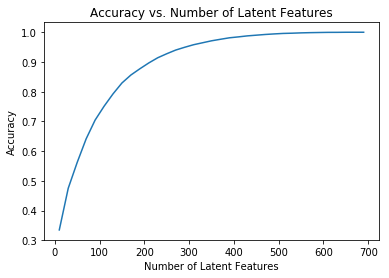

In [70]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations.  Instead, we might split our dataset into a training and test set of data, as shown in the cell below.  

Use the code from question 3 to understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below: 

* How many users can we make predictions for in the test set?  
* How many users are we not able to make predictions for because of the cold start problem?
* How many articles can we make predictions for in the test set?  
* How many articles are we not able to make predictions for because of the cold start problem?

In [71]:
df_train = df.head(40000)
df_test = df.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test user ids
    test_arts - all of the test article ids
    
    '''
    # Your code here
    user_item_train = create_user_item_matrix(df_train)
    user_item_test = create_user_item_matrix(df_test)
    test_idx = list(user_item_test.index.values)
    test_arts = user_item_test.title.columns.values
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [72]:
user_item_train.head()

title                                                          \
article_id 0.0    2.0    4.0    8.0    9.0    12.0   14.0   15.0   16.0     
user_id                                                                     
1             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3             0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
4             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                   ...                                                     \
article_id 18.0    ...   1434.0 1435.0 1436.0 1437.0 1439.0 1440.0 1441.0   
user_id            ...                                                      
1             0.0  ...      0.0    0.0    1.0    0.0    1.0    0.0    0.0   
2             0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3             0.0  ...      0.0    0.0    1.0    0.0    0.0    0.0    0.0   
4             0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5             0.0  ...      0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                                 
article_id 1442.0 1443.0 1444.0  
user_id                          
1             0.0    0.0    0.0  
2             0.0    0.0    0.0  
3             0.0    0.0    0.0  
4             0.0    0.0    0.0  
5             0.0    0.0    0.0  

[5 rows x 714 columns]

In [73]:
user_item_train.shape, user_item_test.shape

((4487, 714), (682, 574))

In [74]:
# find the common users in both test and train set
common_idx = user_item_train.index.isin(test_idx)

In [75]:
common_idx.sum()

20

In [76]:
# total number of user in test set
len(test_idx)

682

In [77]:
# find the common articles in both test and train set
common_arts = user_item_train.title.columns.isin(test_arts)

In [78]:
common_arts.sum()

574

In [79]:
# Replace the values in the dictionary below
a = 662 
b = 574 
c = 20 
d = 0 


sol_4_dict = {
    'How many users can we make predictions for in the test set?': c, 
    'How many users in the test set are we not able to make predictions for because of the cold start problem?': a, 
    'How many movies can we make predictions for in the test set?': b,
    'How many movies in the test set are we not able to make predictions for because of the cold start problem?': d
}

t.sol_4_test(sol_4_dict)

Awesome job!  That's right!  All of the test movies are in the training data, but there are only 20 test users that were also in the training set.  All of the other users that are in the test set we have no data on.  Therefore, we cannot make predictions for these users using SVD.


`5.` Now use the **user_item_train** dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the **user_item_test** dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data. This will require combining what was done in questions `2` - `4`.

Use the cells below to explore how well SVD works towards making predictions for recommendations on the test data.  

In [80]:
# fit SVD on the user_item_train matrix
u_train, s_train, vt_train = np.linalg.svd(user_item_train)# fit svd similar to above then use the cells below

In [81]:
# Use these cells to see how well you can use the training 
# decomposition to predict on test data

In [82]:
common_idx = user_item_train.index.isin(test_idx)

In [83]:
common_arts = user_item_train.title.columns.isin(test_arts)

In [84]:
u_test = u_train[common_idx, :]
vt_test = vt_train[:, common_arts]

In [85]:
s_new, u_new, vt_new = np.diag(s_train[:10]), u_train[:, :10], vt_train[:10, :]
u_test_new, vt_test_new = u_test[:, :10], vt_test[:10, :]


user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))

In [86]:
user_item_matrix.loc[common_idx, :].shape, user_item_est.shape

((20, 714), (4487, 714))

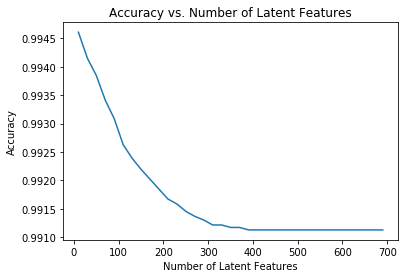

In [91]:
num_latent_feats = np.arange(10,700+10,20)
sum_errs = []
test_sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_new, vt_test_new = u_test[:, :k], vt_test[:k, :]
    
    # take dot product
   
    user_test_item_est = np.around(np.dot(np.dot(u_test_new, s_new), vt_test_new))
    
    # compute error for each prediction to actual value

    test_diffs = np.subtract(user_item_test.loc[user_item_matrix.loc[common_idx, :].index, :], user_test_item_est)
    
    # total errors and keep track of them
    
    test_err = np.sum(np.sum(np.abs(test_diffs)))

    test_sum_errs.append(test_err)
    
    
#plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.plot(num_latent_feats,  1 - np.array(test_sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');